# Data Frame Description

Problem Statement:
Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

# Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

# Loading the dataset

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
#checking shape of dataset
df.shape

(8425, 23)

In [4]:
#checking the columns present
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
#checking datatype
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Observation: Date is in object datatype we will have to convert it to timestamp datatype.

# Checking null values in the dataframe

In [6]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

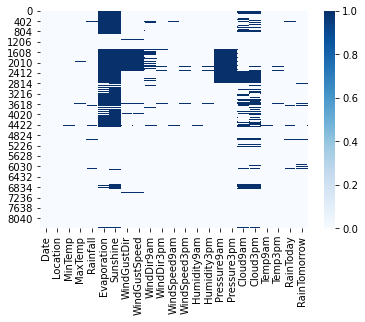

In [7]:
#data visualisation
sns.heatmap(df.isnull(),cmap='Blues')

In [8]:
#%age data missing
for i in df.columns:
    print('% data missing in',i,'is:',(df[i].isnull().sum()/df.shape[0])*100)

% data missing in Date is: 0.0
% data missing in Location is: 0.0
% data missing in MinTemp is: 0.8902077151335311
% data missing in MaxTemp is: 0.7121661721068249
% data missing in Rainfall is: 2.8486646884272995
% data missing in Evaporation is: 41.68545994065282
% data missing in Sunshine is: 47.40652818991098
% data missing in WindGustDir is: 11.762611275964392
% data missing in WindGustSpeed is: 11.762611275964392
% data missing in WindDir9am is: 9.839762611275965
% data missing in WindDir3pm is: 3.6557863501483676
% data missing in WindSpeed9am is: 0.9020771513353115
% data missing in WindSpeed3pm is: 1.2700296735905046
% data missing in Humidity9am is: 0.7002967359050445
% data missing in Humidity3pm is: 1.2106824925816024
% data missing in Pressure9am is: 15.537091988130564
% data missing in Pressure3pm is: 15.572700296735906
% data missing in Cloud9am is: 28.735905044510385
% data missing in Cloud3pm is: 29.139465875370917
% data missing in Temp9am is: 0.6646884272997032
% dat

In [9]:
# Checking Duplicates
df.duplicated().sum()

1663

In [10]:
df.drop_duplicates(keep='first',inplace=True)

In [11]:
df.shape

(6762, 23)

# Filling Missing Values:

In [12]:
#filling missing numerical value
for i in df.columns:
    if (df[i].dtypes=='float')|(df[i].dtypes=='int64'):
        df[i]=df[i].fillna(np.mean(df[i]))

In [13]:
#filling missing categoical value
for i in df.columns:
    if (df[i].dtypes=='object'):
        df[i] = df[i].fillna(df[i].mode()[0])

# Exploratory Data Analysis:

In [14]:
#Date is object datatype,therefore converting it to timestamp.
df['Date']=pd.to_datetime(df['Date'])

In [15]:
#Extracting day,month and year.
df['Day']=pd.to_datetime(df['Date']).dt.day
df['Month']=pd.to_datetime(df['Date']).dt.month
df['Year']=pd.to_datetime(df['Date']).dt.year
#extracting month name,day name and quarter
df['DayName']=pd.to_datetime(df['Date']).dt.day_name()
df['MonthName']=pd.to_datetime(df['Date']).dt.month_name()
df['Quarter']=pd.to_datetime(df['Date']).dt.quarter

In [16]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year,DayName,MonthName,Quarter
0,2008-12-01,Albury,13.4,22.9,0.6,5.302395,7.890896,W,44.0,W,...,16.9,21.8,No,No,1,12,2008,Monday,December,4
1,2008-12-02,Albury,7.4,25.1,0.0,5.302395,7.890896,WNW,44.0,NNW,...,17.2,24.3,No,No,2,12,2008,Tuesday,December,4
2,2008-12-03,Albury,12.9,25.7,0.0,5.302395,7.890896,WSW,46.0,W,...,21.0,23.2,No,No,3,12,2008,Wednesday,December,4
3,2008-12-04,Albury,9.2,28.0,0.0,5.302395,7.890896,NE,24.0,SE,...,18.1,26.5,No,No,4,12,2008,Thursday,December,4
4,2008-12-05,Albury,17.5,32.3,1.0,5.302395,7.890896,W,41.0,ENE,...,17.8,29.7,No,No,5,12,2008,Friday,December,4


In [17]:
#dropping column Date as we have extracted the information from it
df.drop(['Date'],axis=1,inplace=True)

In [18]:
# Taking average of columns temperature,pressure,humidity,windspeed and cloud and create new column
df['Temperature_Diff'] = (df['MaxTemp']-df['MinTemp'])
#Average temperature
df['Average_Temperature'] = (df['Temp9am']+df['Temp3pm'])/2
# Average daily pressure
df['Average_Pressure'] = (df['Pressure9am']+df['Pressure3pm'])/2
# Average humidity
df['Average_Humidity'] = (df['Humidity9am']+df['Humidity3pm'])/2
# Average wind speed
df['Average_Windspeed'] = (df['WindSpeed9am']+df['WindSpeed3pm'])/2
# Average cloud
df['Average_Cloud'] = (df['Cloud9am']+df['Cloud3pm']) / 2

In [19]:
#dropping columns temperature,pressure,humidity,windspeed and cloud as we have already created a new column taking their average
df.drop(['MaxTemp','MinTemp','Temp9am','Temp3pm','Pressure9am','Pressure3pm','WindSpeed9am','WindSpeed3pm','Cloud9am','Cloud3pm','Humidity9am','Humidity3pm'],axis=1,inplace=True)

In [20]:
df.columns

Index(['Location', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow', 'Day', 'Month', 'Year', 'DayName', 'MonthName',
       'Quarter', 'Temperature_Diff', 'Average_Temperature',
       'Average_Pressure', 'Average_Humidity', 'Average_Windspeed',
       'Average_Cloud'],
      dtype='object')

# Univariate Analysis(Numerical Data):

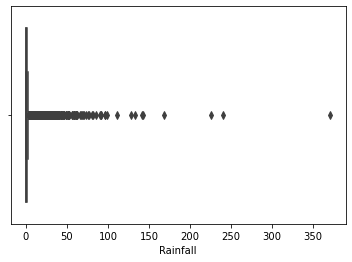

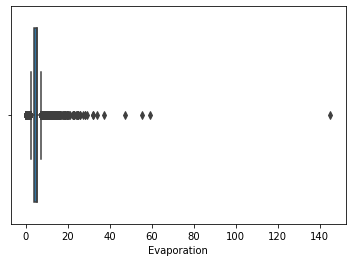

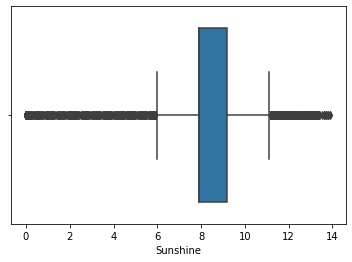

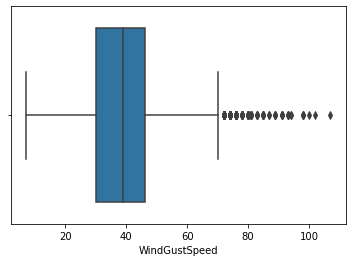

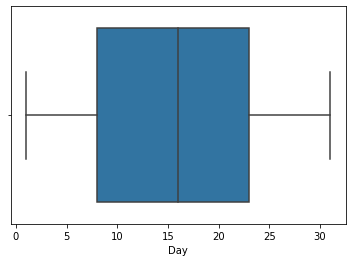

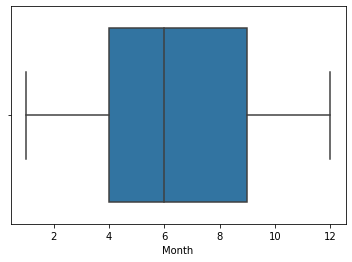

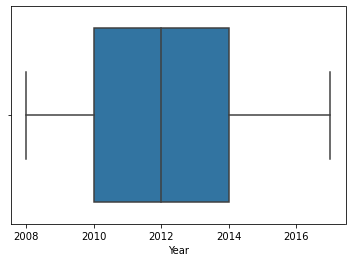

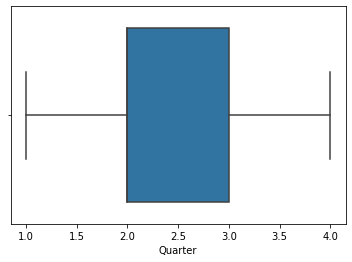

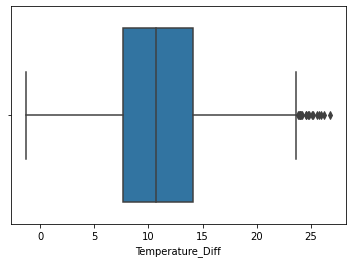

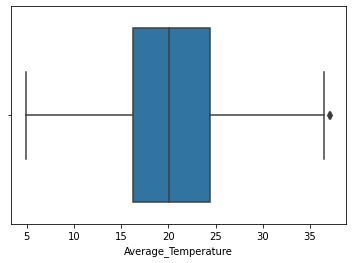

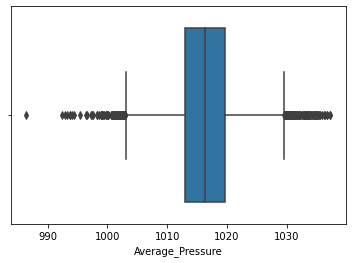

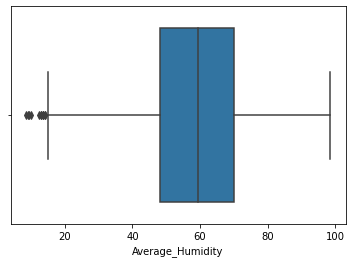

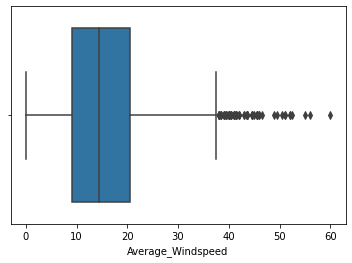

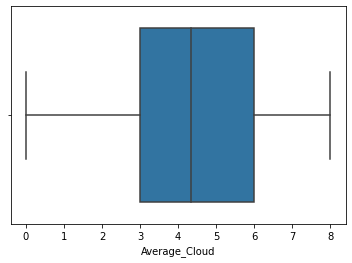

In [21]:
for i in df.columns:
    if (df[i].dtypes=='float')|(df[i].dtypes=='int64'):
        sns.boxplot(x=i,data=df)
        plt.show()    

Observation:
    
1.Maximum rainfall recorded is around 375mm.

2.Maximum Evaporation recorded is around 140mm.

3.Maximum sunshine recorded is around 14hours and minimum around zero.

4.Maximum WindGustSpeed recorded is around 110kmph and minimum around zero and the average is around 40kmph.

5.Maximum Temperature_Diff recorded is around 23 degree celsius and minimum around -1 and the average is around 11degree celsius.

6.Maximum Average Temperature recorded is around 32 degree celsius and minimum around 5 degree celsius and the mean is around 20degree celsius

7.Maximum Average Pressure recorded is around 1040 hpa and minimum around 985 hpa and the mean is around 1018 hpa.

8.Maximum Average Humidity recorded is around 97 percent hpa and minimum around 15 percent and the mean is around 60 percent.

9.Maximum Average Windspeed recorded is around 60kmph and minimum around 0kmph and the mean is around 15kmph.

# Univariate Analysis(Categorical Data):

In [22]:
for i in df.columns:
    if (df[i].dtypes=='object'):
        print(f'================================{i}===================================')
        print(df[i].value_counts())
        print('\n')

================================Location===================================
PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64


================================WindGustDir===================================
E      1460
SW      465
N       459
W       434
WSW     420
WNW     398
SSE     390
S       376
SE      370
ENE     357
NE      300
SSW     299
NW      296
NNE     287
ESE     267
NNW     184
Name: WindGustDir, dtype: int64


================================WindDir9am===================================
N      1403
SW      590
NW      463
SE      439
ENE     397
WSW     394
SSW     368
NE      364
E       338
NNE     337
S       324
WNW     301
SSE     300
W       299
ESE     229
NNW     216
Name: WindDir9am, dtype: int64


================================W

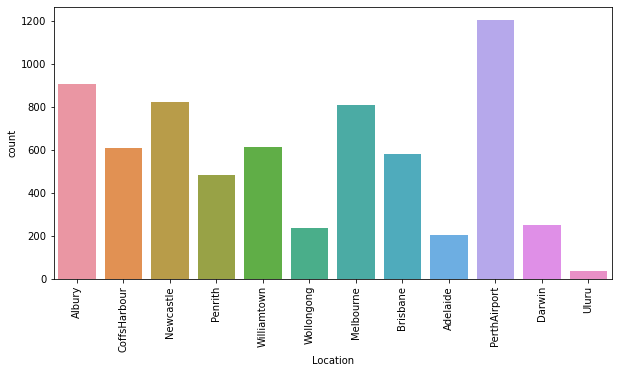

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

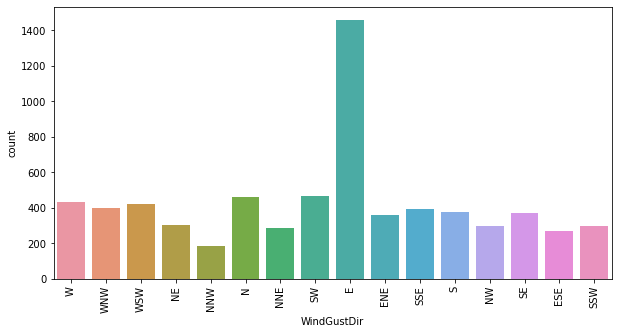

<Figure size 720x360 with 0 Axes>

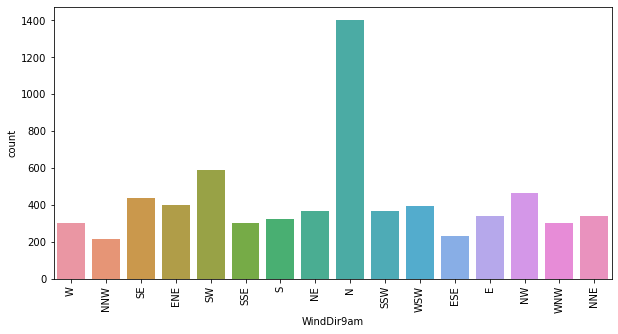

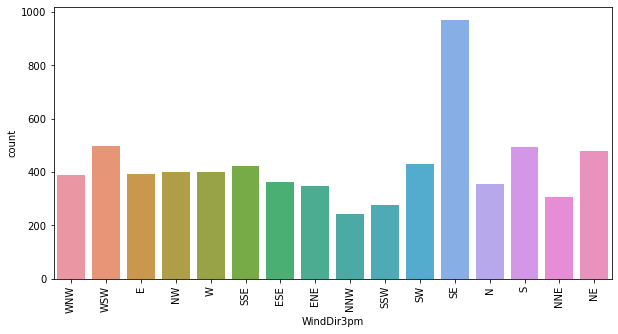

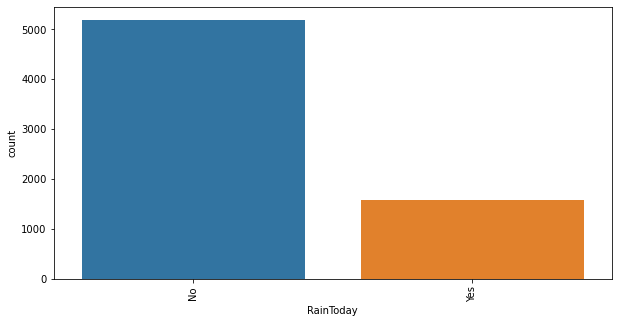

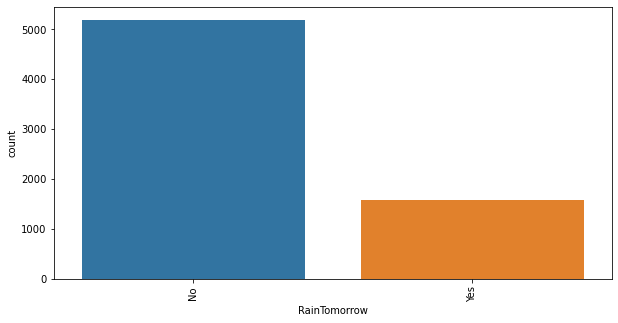

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

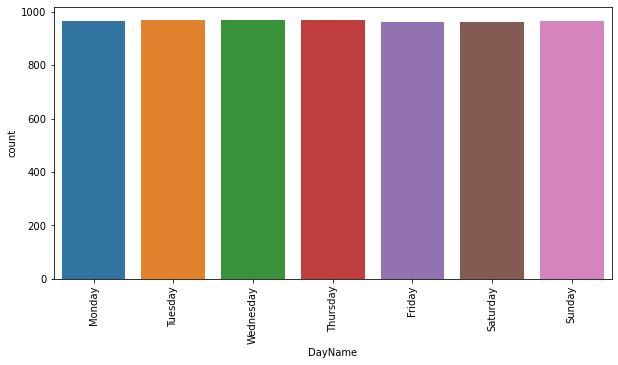

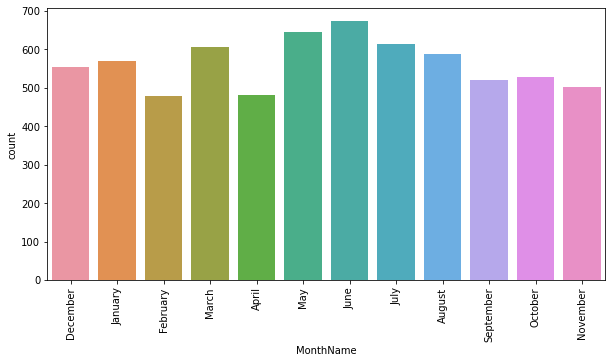

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [23]:
for i in df.columns:
    plt.figure(figsize=(10,5))
    if (df[i].dtypes=='object'):
        plt.xticks(rotation=90)
        sns.countplot(x=i,data=df)
        plt.show()

Observation:
    
1.The location PerthAirport has the highest majority.

2.East has the highest majority in windgustdir.

3.North has the highest majority in WindDir9am.

4.SouthEast has the highest majority in WindDir3pm.

5.RainToday has the majority as 'No'.

6.RainTomorrow has the majority as 'No'

7.Month May,June,July has the highest majority.

In [24]:
# Converting RainToday & RainTommorow to Numerical Data For better EDA
df['RainToday']=df['RainToday'].replace('Yes',1)
df['RainToday']=df['RainToday'].replace('No',0)
df['RainTomorrow']=df['RainTomorrow'].replace('Yes',1)
df['RainTomorrow']=df['RainTomorrow'].replace('No',0)

# Bivariate Analysis:

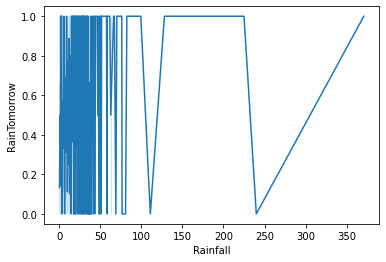

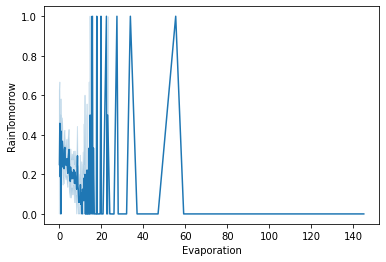

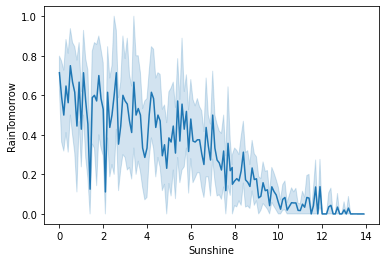

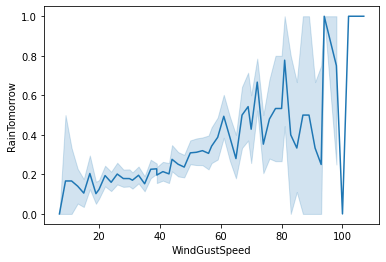

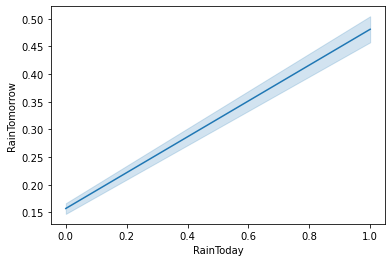

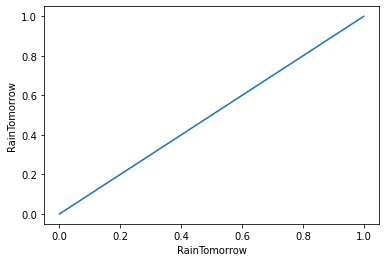

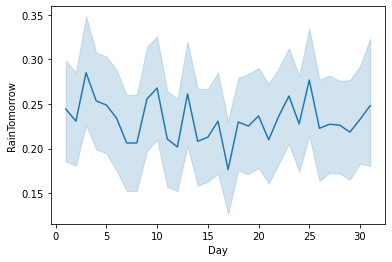

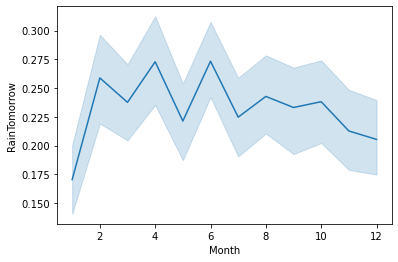

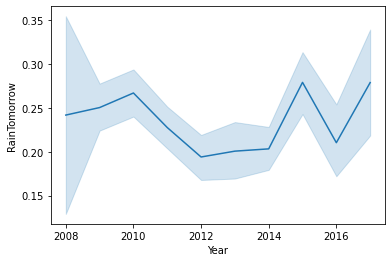

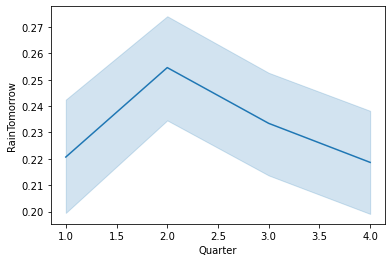

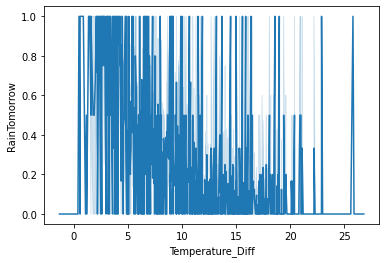

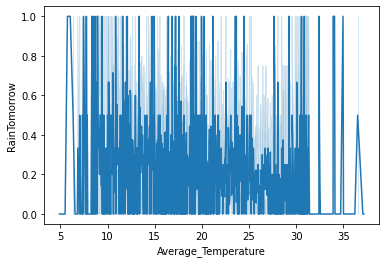

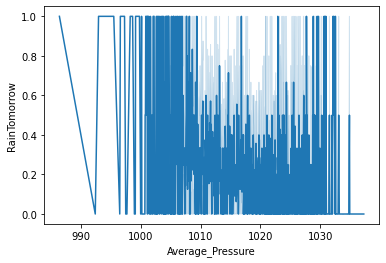

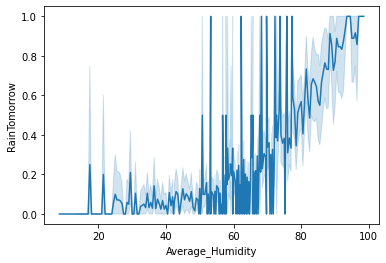

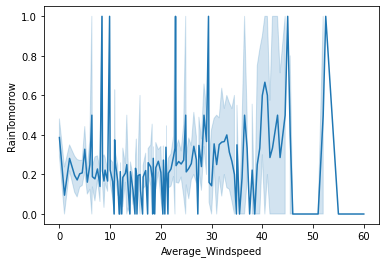

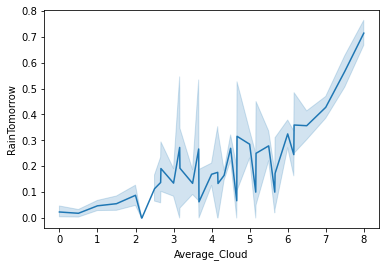

In [25]:
for i in df.columns:
    if (df[i].dtypes=='float')|(df[i].dtypes=='int64'):
        sns.lineplot(x=i,y='RainTomorrow',data=df)
        plt.show()    

Key Observations:
    
1.With decrease in sunshine there is high possibility of raintomorrow.

2.With increase in WindGustSpeed there is high possibility of raintomorrow.

3.Lower temperature difference have high possibility of raintomorrow.

4.Lower average temperature have high possibility of raintomorrow.

5.Lower average pressure have high possibility of raintomorrow.

6.With increase in average humidity there is high possibility of rain tommorow.

7.With increase in average windspeed there is high possibility of rain tommorow.

8.With increase in average cloud there is high possibility of rain tommorow.

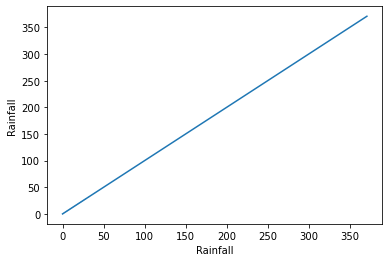

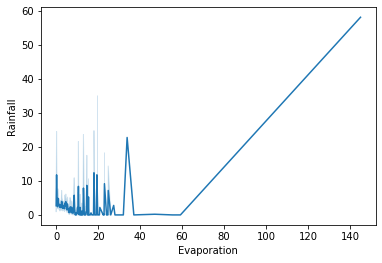

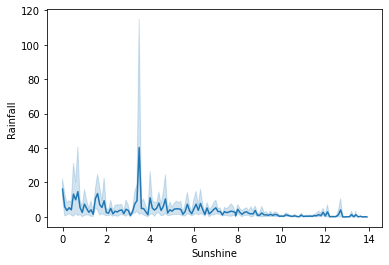

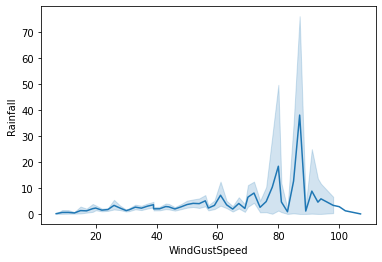

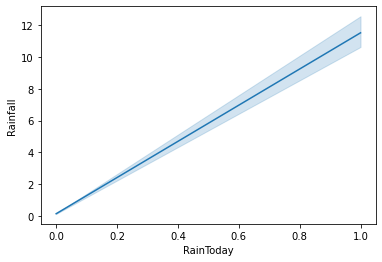

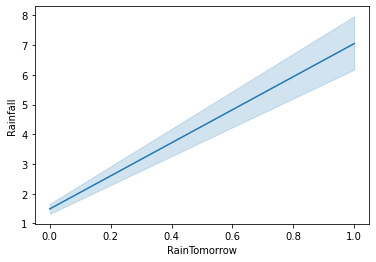

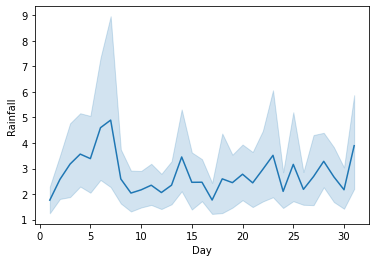

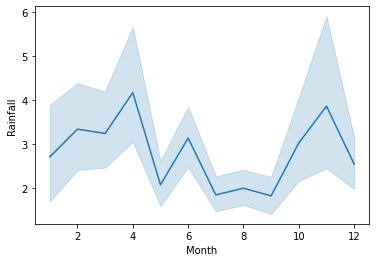

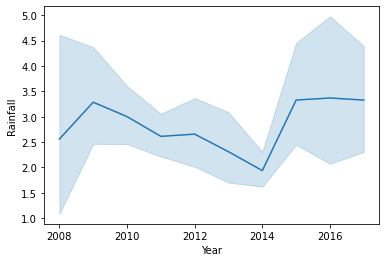

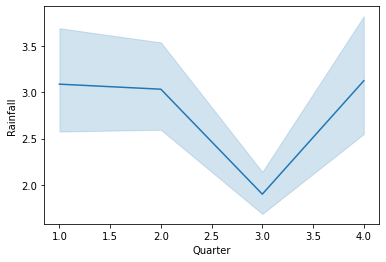

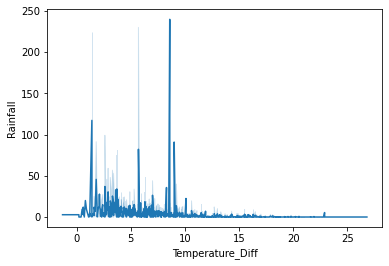

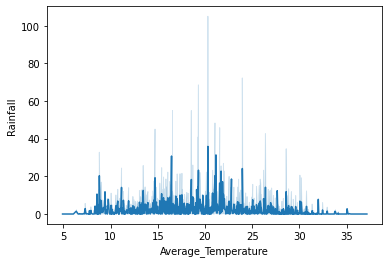

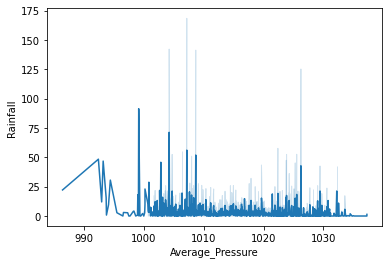

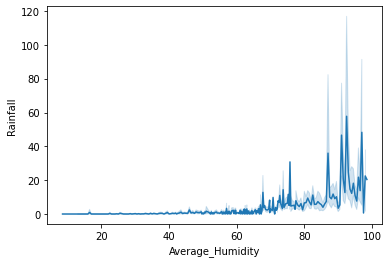

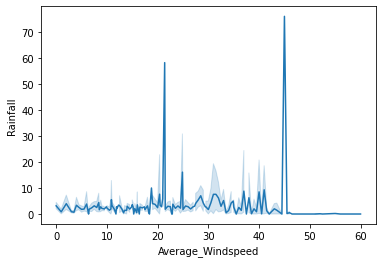

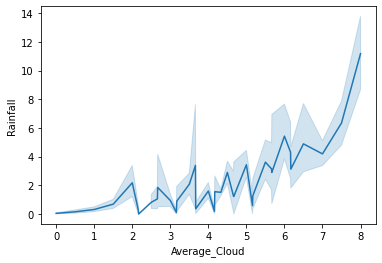

In [26]:
for i in df.columns:
    if (df[i].dtypes=='float')|(df[i].dtypes=='int64'):
        sns.lineplot(x=i,y='Rainfall',data=df)
        plt.show()    

Key Observations:
    
1.High the value of evaporation higher will be the amount of rainfall.

2.High the value of sunshine lesser will be the amount of rainfall.

3.High the value of WindGustSpeed higher will be the amount of rainfall.

4.Month April,July and November records heavy rainfall.

5.Heavy rainfall was recorded in the year 2009 and 2016.

6.Lower temperature difference recored high rainfall.

7.Lower average pressure recored high rainfall.

8.Higher average humidity recored high rainfall.

9.Higher average windspeed recored high rainfall.

10.Higher average cloud recored high rainfall.

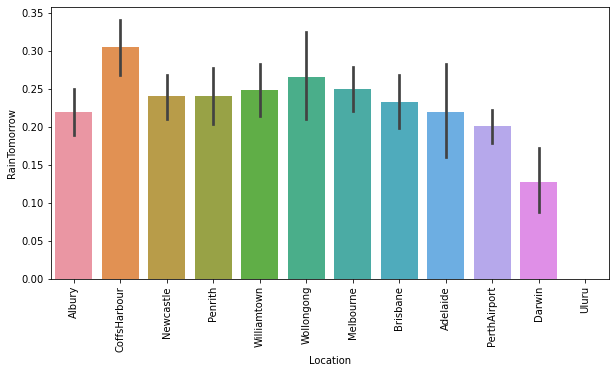

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

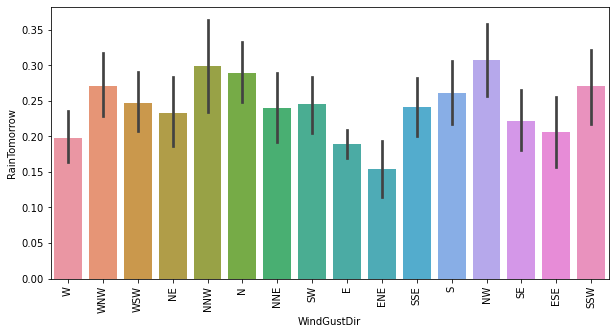

<Figure size 720x360 with 0 Axes>

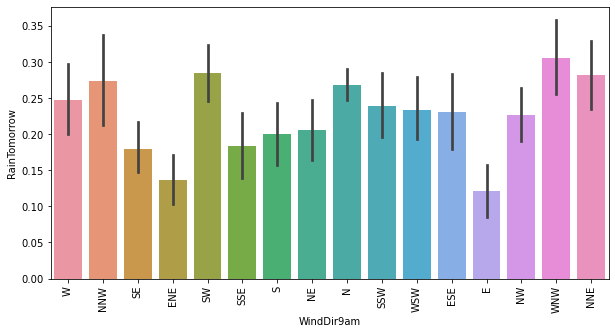

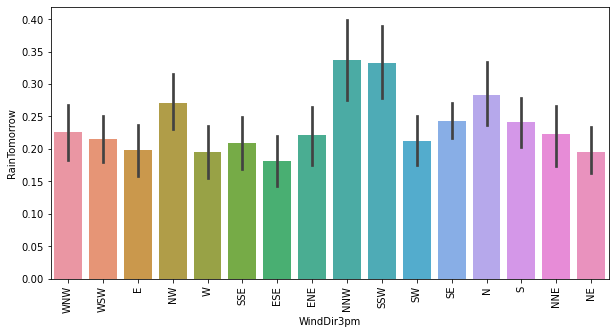

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

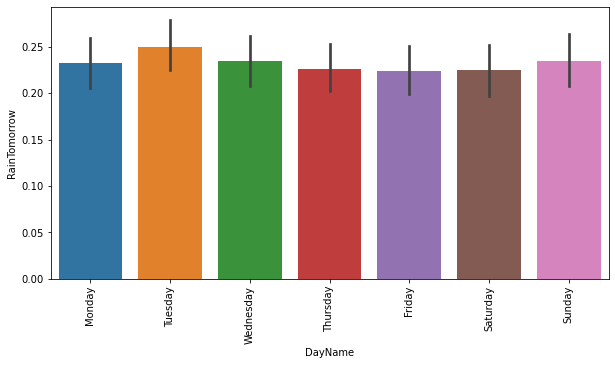

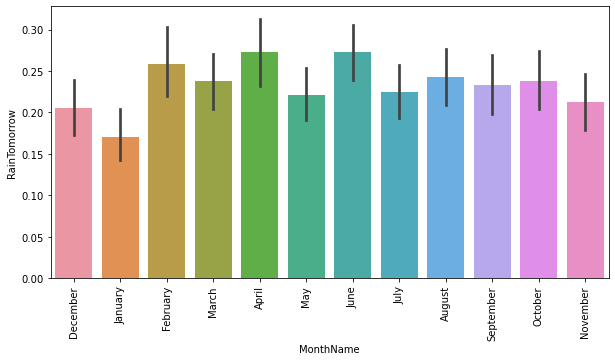

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [27]:
for i in df.columns:
    plt.figure(figsize=(10,5))
    if (df[i].dtypes=='object'):
        plt.xticks(rotation=90)
        sns.barplot(x=i,y='RainTomorrow',data=df)
        plt.show()

Observation:
    
1.Location CoffsHarbour has high possibility of rain tommorow.

2.The region with windgust direction N,NW and NNW have high possibility of rain tommorow. 

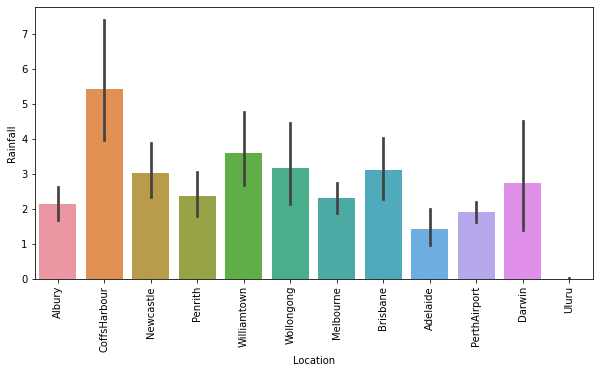

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

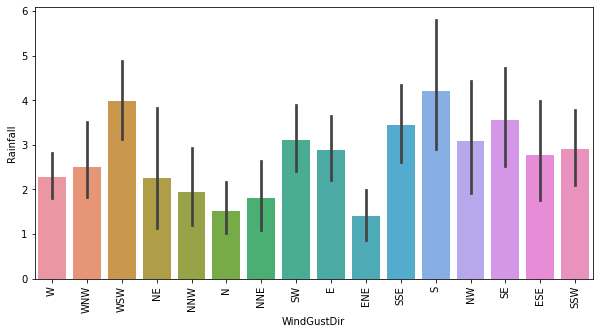

<Figure size 720x360 with 0 Axes>

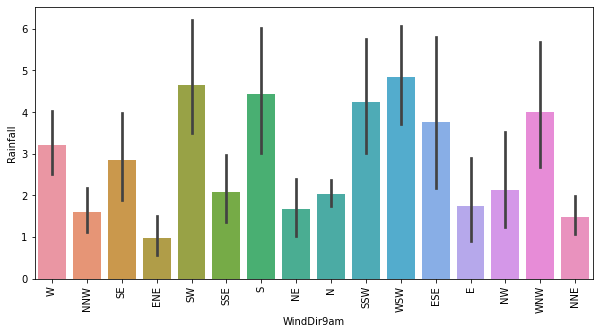

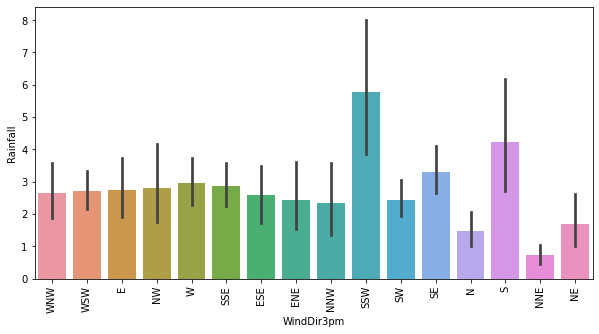

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

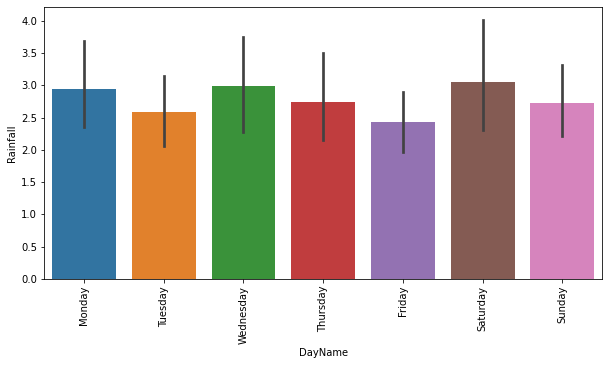

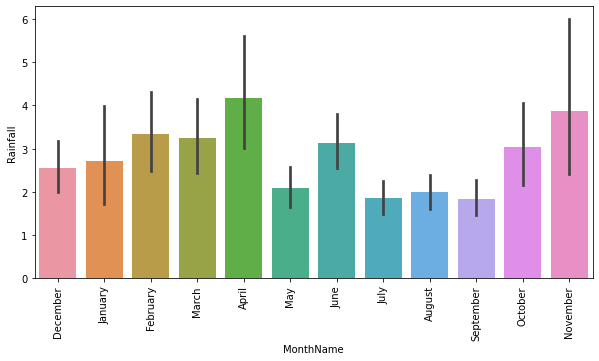

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [28]:
for i in df.columns:
    plt.figure(figsize=(10,5))
    if (df[i].dtypes=='object'):
        plt.xticks(rotation=90)
        sns.barplot(x=i,y='Rainfall',data=df)
        plt.show()

Observation:
    
1.Location CoffsHarbour recorded highest rainfall.

2.Highest rainfall was recorded in the month of April and November.

In [29]:
df.drop(['DayName','MonthName'],axis=1,inplace=True)

# Data Set Description

In [30]:
df.describe()

,Rainfall,Evaporation,Sunshine,WindGustSpeed,RainToday,RainTomorrow,Day,Month,Year,Quarter,Temperature_Diff,Average_Temperature,Average_Pressure,Average_Humidity,Average_Windspeed,Average_Cloud
count,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000
mean,2.780148,5.302395,7.890896,38.977663,0.232476,0.232476,15.737208,6.462141,2012.052203,2.479444,10.989199,20.301799,1016.373117,58.986853,15.176678,4.328897
std,10.482769,3.343713,2.733639,13.376457,0.422442,0.422442,8.793898,3.377471,2.301057,1.099249,4.338200,5.599453,5.942147,16.155082,8.515116,2.142558
min,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,2008.000000,1.000000,-1.309145,4.900000,986.350000,8.500000,0.000000,0.000000
25%,0.000000,4.000000,7.890896,30.000000,0.000000,0.000000,8.000000,4.000000,2010.000000,2.000000,7.700000,16.200000,1012.950000,48.000000,9.000000,3.000000
50%,0.000000,5.302395,7.890896,38.977663,0.000000,0.000000,16.000000,6.000000,2012.000000,2.000000,10.750000,20.050000,1016.373117,59.500000,14.500000,4.328897
75%,1.200000,5.302395,9.200000,46.000000,0.000000,0.000000,23.000000,9.000000,2014.000000,3.000000,14.100000,24.400000,1019.600000,70.000000,20.500000,6.000000
max,371.000000,145.000000,13.900000,107.000000,1.000000,1.000000,31.000000,12.000000,2017.000000,4.000000,26.800000,37.150000,1037.300000,98.500000,60.000000,8.000000


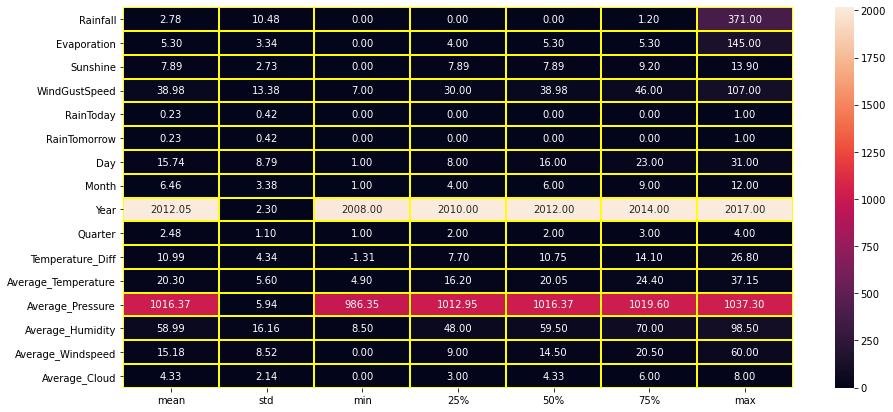

In [31]:
#visualisation
plt.figure(figsize=(15,7))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,linewidth=1,linecolor='yellow',fmt='.2f')
plt.show()

Key observation:
    
1.High diffrence between 3rd quartile and max in Rainfall,Evaporation,WindGustSpeed indicates presence of outliers.

2.Columns temperature diff,average temperatue,average pressure and average wind speed has mean greater than median indicating right skewness.

3.Average Humidity has median greater than mean indicating left skewness.

# Correlation

In [32]:
df.corr()['RainTomorrow'].sort_values()

Temperature_Diff      -0.350610
Sunshine              -0.345509
Average_Pressure      -0.146862
Average_Temperature   -0.121420
Evaporation           -0.076733
Year                  -0.014769
Day                   -0.007560
Quarter               -0.007226
Month                 -0.003575
Average_Windspeed      0.057638
WindGustSpeed          0.184435
Rainfall               0.224213
RainToday              0.323691
Average_Cloud          0.367535
Average_Humidity       0.420314
RainTomorrow           1.000000
Name: RainTomorrow, dtype: float64

<AxesSubplot:>

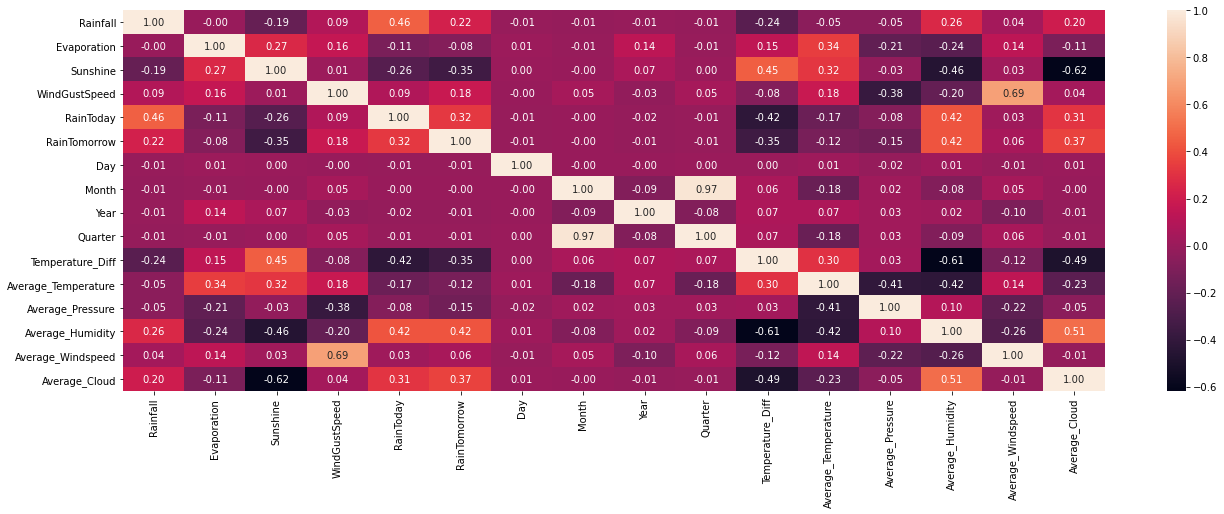

In [33]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linecolor='yellow')

Observation:
    
Columns Average Humidity is highly correlated with target rain tomorrow and Temperature_Diff is least correlated with the target.

# Checking Skewness

In [34]:
df.skew()

Rainfall               13.650294
Evaporation            13.553368
Sunshine               -0.882147
WindGustSpeed           0.780437
RainToday               1.266937
RainTomorrow            1.266937
Day                     0.006240
Month                   0.021988
Year                    0.354481
Quarter                 0.029864
Temperature_Diff        0.283970
Average_Temperature     0.130415
Average_Pressure        0.054933
Average_Humidity       -0.151549
Average_Windspeed       0.649328
Average_Cloud          -0.243264
dtype: float64

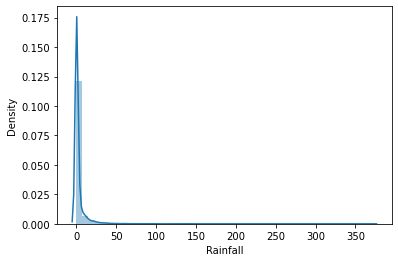

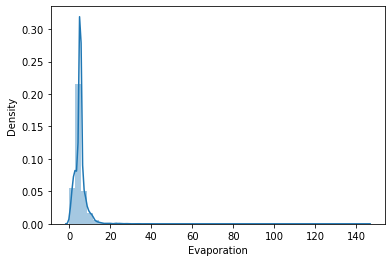

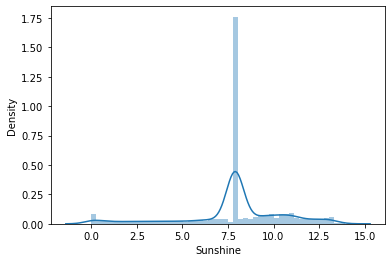

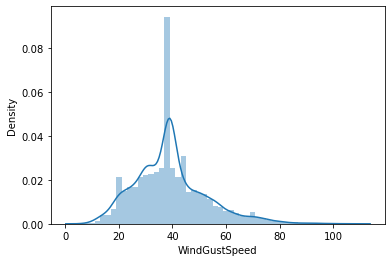

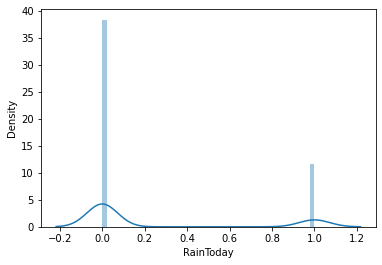

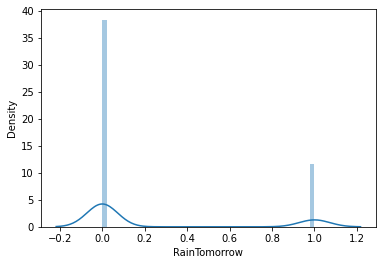

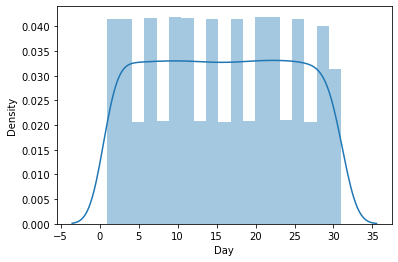

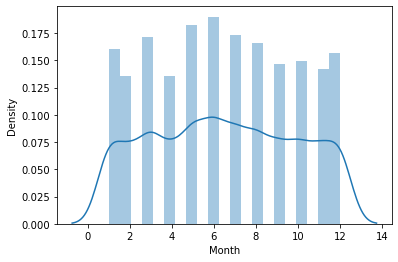

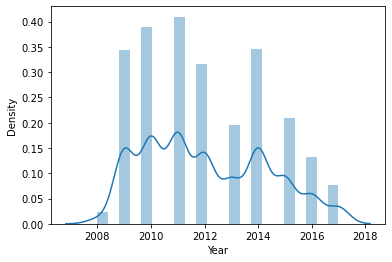

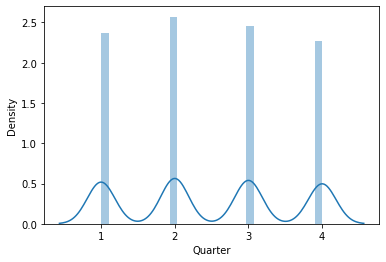

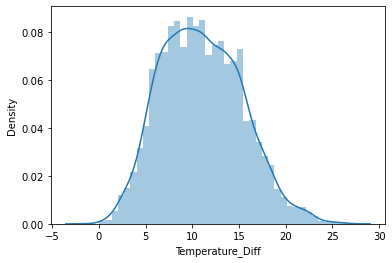

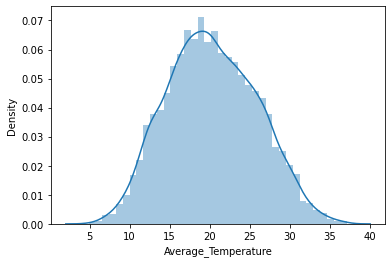

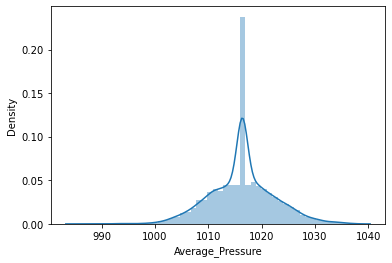

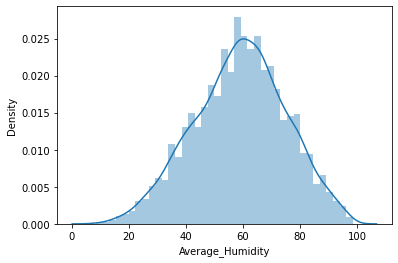

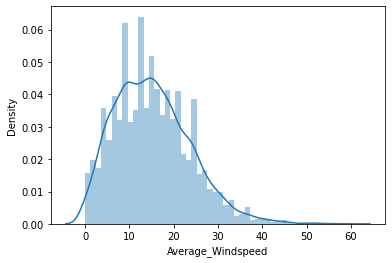

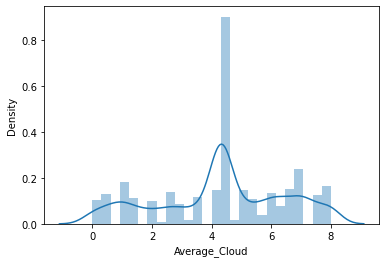

In [35]:
for i in df.columns:
    if (df[i].dtypes=='float')|(df[i].dtypes=='int64'):
        sns.distplot(df[i])
        plt.show()

Observation:
    
Continous features Rainfall(target) and evaporation is highly skewed.

# Outliers Checking:

Rainfall                   AxesSubplot(0.125,0.71587;0.110714x0.16413)
Evaporation             AxesSubplot(0.257857,0.71587;0.110714x0.16413)
Sunshine                AxesSubplot(0.390714,0.71587;0.110714x0.16413)
WindGustSpeed           AxesSubplot(0.523571,0.71587;0.110714x0.16413)
RainToday               AxesSubplot(0.656429,0.71587;0.110714x0.16413)
RainTomorrow            AxesSubplot(0.789286,0.71587;0.110714x0.16413)
Day                       AxesSubplot(0.125,0.518913;0.110714x0.16413)
Month                  AxesSubplot(0.257857,0.518913;0.110714x0.16413)
Year                   AxesSubplot(0.390714,0.518913;0.110714x0.16413)
Quarter                AxesSubplot(0.523571,0.518913;0.110714x0.16413)
Temperature_Diff       AxesSubplot(0.656429,0.518913;0.110714x0.16413)
Average_Temperature    AxesSubplot(0.789286,0.518913;0.110714x0.16413)
Average_Pressure          AxesSubplot(0.125,0.321957;0.110714x0.16413)
Average_Humidity       AxesSubplot(0.257857,0.321957;0.110714x0.16413)
Averag

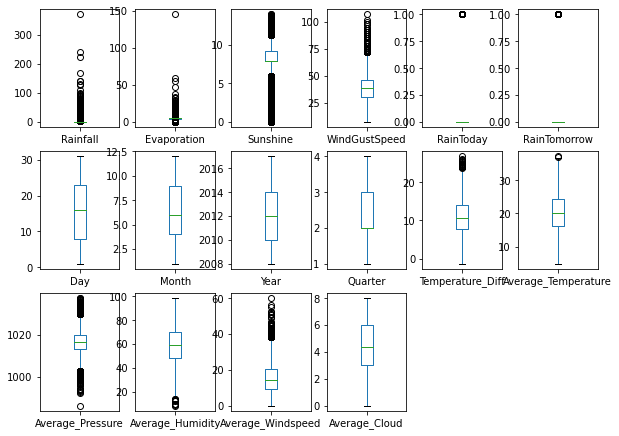

In [36]:
df.plot(kind='box',subplots=True,layout=(4,6),figsize=(10,10))

Observation:(For continuous feature)
    
Rainfall,Evaporation,Sunshine,WindGustspeed,temperature_diff,average_pressure,average_humidity and average_windspeed has outliers present.

# Data Preprocessing

# REMOVING OUTLIERS:

In [37]:
#using quantile method
for i in df.columns:
    if (df[i].dtypes=='float')|(df[i].dtypes=='int64'):
            ub=df[i].quantile(0.99)
            lb=df[i].quantile(0.01)
            print(i)
            print('upper bound:',ub)
            print('lower bound:',lb)
            print('\n')

Rainfall
upper bound: 39.4340000000002
lower bound: 0.0


Evaporation
upper bound: 14.6
lower bound: 0.6


Sunshine
upper bound: 13.2
lower bound: 0.0


WindGustSpeed
upper bound: 78.0
lower bound: 13.0


RainToday
upper bound: 1.0
lower bound: 0.0


RainTomorrow
upper bound: 1.0
lower bound: 0.0


Day
upper bound: 31.0
lower bound: 1.0


Month
upper bound: 12.0
lower bound: 1.0


Year
upper bound: 2017.0
lower bound: 2009.0


Quarter
upper bound: 4.0
lower bound: 1.0


Temperature_Diff
upper bound: 21.8
lower bound: 2.459990156599545


Average_Temperature
upper bound: 32.95
lower bound: 8.85


Average_Pressure
upper bound: 1031.5500000000002
lower bound: 1002.3304999999999


Average_Humidity
upper bound: 93.0
lower bound: 21.0


Average_Windspeed
upper bound: 39.0
lower bound: 0.0


Average_Cloud
upper bound: 8.0
lower bound: 0.0




In [38]:
df_new=df[(df['Evaporation']<=14.6)&(df['Evaporation']>=0.6)]
df_new=df[(df['Sunshine']<=13.2)&(df['Sunshine']>=0.0)]
df_new=df[(df['Temperature_Diff']<=21.8)&(df['Temperature_Diff']>=2.459)]
df_new=df[(df['Average_Temperature']<=32.95)&(df['Average_Temperature']>=8.85)]
df_new=df[(df['Average_Pressure']<=1031.55)&(df['Average_Temperature']>=1002.33)]
df_new=df[(df['Average_Humidity']<=93.0)&(df['Average_Humidity']>=21.0)]
df_new=df[(df['Average_Windspeed']<=39.0)&(df['Average_Windspeed']>=0.0)]
df_new=df[(df['Average_Cloud']<=8.0)&(df['Average_Cloud']>=0.0)]

In [39]:
df_new.shape[0]

6762

In [40]:
data_loss=((df.shape[0]-df_new.shape[0])/df.shape[0])*100
data_loss

0.0

In [41]:
#outliers might be very close to the whiskers and cannot be treated as as outlier
df=df_new

# Converting string data to numeric data

In [42]:
df.head()

,Location,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year,Quarter,Temperature_Diff,Average_Temperature,Average_Pressure,Average_Humidity,Average_Windspeed,Average_Cloud
0,Albury,0.6,5.302395,7.890896,W,44.0,W,WNW,0,0,1,12,2008,4,9.5,19.35,1007.40,46.5,22.0,6.160494
1,Albury,0.0,5.302395,7.890896,WNW,44.0,NNW,WSW,0,0,2,12,2008,4,17.7,20.75,1009.20,34.5,13.0,4.328897
2,Albury,0.0,5.302395,7.890896,WSW,46.0,W,WSW,0,0,3,12,2008,4,12.8,22.10,1008.15,34.0,22.5,3.168403
3,Albury,0.0,5.302395,7.890896,NE,24.0,SE,E,0,0,4,12,2008,4,18.8,22.30,1015.20,30.5,10.0,4.328897
4,Albury,1.0,5.302395,7.890896,W,41.0,ENE,NW,0,0,5,12,2008,4,14.8,23.75,1008.40,57.5,13.5,7.500000


In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [44]:
df.head()

,Location,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year,Quarter,Temperature_Diff,Average_Temperature,Average_Pressure,Average_Humidity,Average_Windspeed,Average_Cloud
0,1,0.6,5.302395,7.890896,13,44.0,13,14,0,0,1,12,2008,4,9.5,19.35,1007.40,46.5,22.0,6.160494
1,1,0.0,5.302395,7.890896,14,44.0,6,15,0,0,2,12,2008,4,17.7,20.75,1009.20,34.5,13.0,4.328897
2,1,0.0,5.302395,7.890896,15,46.0,13,15,0,0,3,12,2008,4,12.8,22.10,1008.15,34.0,22.5,3.168403
3,1,0.0,5.302395,7.890896,4,24.0,9,0,0,0,4,12,2008,4,18.8,22.30,1015.20,30.5,10.0,4.328897
4,1,1.0,5.302395,7.890896,13,41.0,1,7,0,0,5,12,2008,4,14.8,23.75,1008.40,57.5,13.5,7.500000


# Skewness Treatment:

In [45]:
x=df.drop(['Rainfall'],axis=1)
y=df['Rainfall']

In [46]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-1.45770787,  0.1710398 , -0.09935077, ..., -0.78603778,
         0.84087678,  0.85605151],
       [-1.45770787,  0.1710398 , -0.09935077, ..., -1.49649811,
        -0.13426227, -0.01632294],
       [-1.45770787,  0.1710398 , -0.09935077, ..., -1.52544961,
         0.88959285, -0.55823573],
       ...,
       [ 1.14856639,  0.1710398 , -0.09935077, ..., -1.26290151,
        -0.65614103, -0.01632294],
       [ 1.14856639,  0.1710398 , -0.09935077, ..., -1.32162257,
        -0.51820367, -0.86558298],
       [ 1.14856639,  0.1710398 , -0.09935077, ..., -0.63461881,
         0.32536385,  1.74879298]])

In [47]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)
x

array([[0.12575839, 0.26351337, 0.4411388 , ..., 0.38869514, 0.53112709,
        0.75977416],
       [0.12575839, 0.26351337, 0.4411388 , ..., 0.25810159, 0.37488653,
        0.52502884],
       [0.12575839, 0.26351337, 0.4411388 , ..., 0.25277986, 0.53893257,
        0.37920672],
       ...,
       [0.8491973 , 0.26351337, 0.4411388 , ..., 0.30104024, 0.2912691 ,
        0.52502884],
       [0.8491973 , 0.26351337, 0.4411388 , ..., 0.29024641, 0.31336995,
        0.29650333],
       [0.8491973 , 0.26351337, 0.4411388 , ..., 0.41652828, 0.44852961,
        1.        ]])

In [48]:
x.shape

(6762, 19)

# Predicting Rainfall

# Model Building:

In [49]:
# Since our target is continuous variable we will use regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=i)
    lr.fit(x_train,y_train)
    train_pred=lr.predict(x_train)
    test_pred=lr.predict(x_test)
    if round(r2_score(y_train,train_pred),1)==round(r2_score(y_test,test_pred),1):
        print('training score :',r2_score(y_train,train_pred))
        print('testing score :',r2_score(y_test,test_pred))
        print('At random_state=',i,"the model performs well",'\n')

training score : 0.22842855351971836
testing score : 0.23896477988759723
At random_state= 3 the model performs well 

training score : 0.24285173141114968
testing score : 0.21131089003702241
At random_state= 8 the model performs well 

training score : 0.24505836980938134
testing score : 0.20380509471502484
At random_state= 11 the model performs well 

training score : 0.23130412661049604
testing score : 0.23214134008378506
At random_state= 13 the model performs well 

training score : 0.24060581042753804
testing score : 0.21183277608806772
At random_state= 16 the model performs well 

training score : 0.2282418509573283
testing score : 0.24037638120119376
At random_state= 17 the model performs well 

training score : 0.23961893812739554
testing score : 0.21518534950159696
At random_state= 21 the model performs well 

training score : 0.22711673750492645
testing score : 0.24367619104624094
At random_state= 24 the model performs well 

training score : 0.2278327464384714
testing score :

In [50]:
#selecting random_state =76
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=76)
lr.fit(x_train,y_train)
test_pred=lr.predict(x_test)
train_pred=lr.predict(x_train)
print('testing score :',r2_score(y_test,test_pred))
print('training score :',r2_score(y_train,train_pred))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,test_pred))
print('Mean squared error:',mean_squared_error(y_test,test_pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,test_pred)))

testing score : 0.23508013654912663
training score : 0.23030925047195028
Error:
Mean absolue error: 3.2010824520945316
Mean squared error: 82.76116475225558
Root Mean squared error: 9.097316348916069


In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from xgboost import XGBRegressor

In [52]:
model=[DecisionTreeRegressor(),KNeighborsRegressor(),LinearRegression(),GradientBoostingRegressor(),RandomForestRegressor(),AdaBoostRegressor(),XGBRegressor()]
for i in model:
    i.fit(x_train,y_train)
    i_pred=i.predict(x_test)
    train_pred=i.predict(x_train)
    print(i)
    print('testing score :',r2_score(y_test,i_pred))
    print('training score :',r2_score(y_train,train_pred))

    print('Error:')
    print('Mean absolue error:',mean_absolute_error(y_test,i_pred))
    print('Mean squared error:',mean_squared_error(y_test,i_pred))
    print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,i_pred)))
    print()
    print()


DecisionTreeRegressor()
testing score : -0.38242885944301985
training score : 1.0
Error:
Mean absolue error: 3.2517935065344776
Mean squared error: 149.57308348416888
Root Mean squared error: 12.230007501394628


KNeighborsRegressor()
testing score : 0.05174961339613704
training score : 0.4445575621566691
Error:
Mean absolue error: 2.703756297574065
Mean squared error: 102.59676891911775
Root Mean squared error: 10.129006314496884


LinearRegression()
testing score : 0.23508013654912663
training score : 0.23030925047195028
Error:
Mean absolue error: 3.2010824520945316
Mean squared error: 82.76116475225558
Root Mean squared error: 9.097316348916069


GradientBoostingRegressor()
testing score : 0.2504230104323366
training score : 0.7464284502414479
Error:
Mean absolue error: 2.5472627760829556
Mean squared error: 81.10112927155457
Root Mean squared error: 9.005616540334957


RandomForestRegressor()
testing score : 0.19348210308610037
training score : 0.89617532568315
Error:
Mean absolue 

# TUNING THE MODEL USING GRID SEARCH CV

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
#tuning random forest model
from sklearn.ensemble import RandomForestRegressor
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[5,10],'n_estimators':[100,200,300,350]}
rf=RandomForestRegressor()
rfg=GridSearchCV(rf,parameters)
rfg.fit(x_train,y_train)
print(rfg.best_params_)

{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 350}


In [55]:
rf=RandomForestRegressor(n_estimators=200,max_features='sqrt',max_depth=10)    
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
rf.score(x_train,y_train)
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(rf,x,y,cv=5)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,rfpred))
print('training score :',rf.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,rfpred))
print('Mean squared error:',mean_squared_error(y_test,rfpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,rfpred)))

The CV score is: 0.30956490784014484
testing score : 0.23369469854244396
training score : 0.8401300011036286
Error:
Mean absolue error: 2.5052777744351564
Mean squared error: 82.91106341302225
Root Mean squared error: 9.105551241579075


In [56]:
#kneighbors 
parameters={'n_neighbors':[2,3,5,10,15,20,25,30,35,40,45,50,55,60],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
knr=KNeighborsRegressor()
knrg=GridSearchCV(knr,parameters)
knrg.fit(x_train,y_train)
print(knrg.best_params_)

{'algorithm': 'auto', 'n_neighbors': 45, 'weights': 'distance'}


In [57]:
knr=KNeighborsRegressor(n_neighbors=45,algorithm='auto',weights='distance')
knr.fit(x_train,y_train)
knrpred=knr.predict(x_test)
knr.score(x_train,y_train)
cv_score=cross_val_score(knr,x,y,cv=5)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,knrpred))
print('training score :',knr.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,knrpred))
print('Mean squared error:',mean_squared_error(y_test,knrpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,knrpred)))

The CV score is: 0.25812893387442964
testing score : 0.23528647908898848
training score : 1.0
Error:
Mean absolue error: 2.4207915110367537
Mean squared error: 82.73883934308152
Root Mean squared error: 9.096089233460802


In [58]:
#tuning gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['squared_error','absolute_error','huber','quantile'],'learning_rate':[0.1,0.001,1,10],'n_estimators':[100,200,300,350]}
gb=GradientBoostingRegressor()
gbrg=GridSearchCV(gb,parameters)
gbrg.fit(x_train,y_train)
print(gbrg.best_params_)

{'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 350}


In [59]:
gb=GradientBoostingRegressor(n_estimators=350,loss='huber',learning_rate=0.1)
gb.fit(x_train,y_train)
gbpred=gb.predict(x_test)
gb.score(x_train,y_train)
cv_score=cross_val_score(gb,x,y,cv=5)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,gbpred))
print('training score :',gb.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,gbpred))
print('Mean squared error:',mean_squared_error(y_test,gbpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,gbpred)))

The CV score is: 0.2384613974080633
testing score : 0.20007621524447716
training score : 0.40390608170187225
Error:
Mean absolue error: 2.206633136099478
Mean squared error: 86.54844422621207
Root Mean squared error: 9.303141632062369


# CONCLUSION:

Comparing the performance metrics we selecting KNR as our final model as it is very perforing better in comparison to other model

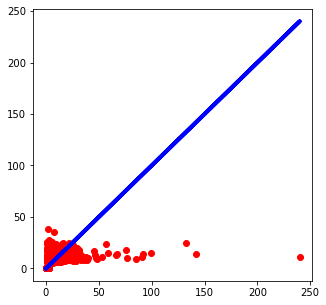

In [60]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,knrpred,color='r')
plt.plot(y_test,y_test,color='b',linewidth='4')
plt.show()

In [61]:
roriginal=np.array(y_test)
rpredicted=np.array(rfpred)
df_comp=pd.DataFrame({'Original':roriginal,'Predicted':rpredicted},index=range(len(roriginal)))
df_comp.sample(10)

,Original,Predicted
1310,0.400000,0.170561
164,0.000000,0.456451
825,0.200000,0.478717
1850,0.000000,0.207035
1084,0.000000,0.135976
1317,0.000000,0.110852
2023,2.780148,1.079558
341,12.800000,9.214156
800,0.000000,0.068556
1646,0.000000,0.393230


# Predicting RainTomorrow

In [62]:
#assign the value target and feature
xc = df.drop(['RainTomorrow'],axis=1)
yc = df["RainTomorrow"]

In [63]:
yc.value_counts()

0    5190
1    1572
Name: RainTomorrow, dtype: int64

In [64]:
from sklearn.preprocessing import power_transform
xc=power_transform(xc,method='yeo-johnson')
xc

array([[-1.45770787,  0.59275567,  0.1710398 , ..., -0.78603778,
         0.84087678,  0.85605151],
       [-1.45770787, -0.68188846,  0.1710398 , ..., -1.49649811,
        -0.13426227, -0.01632294],
       [-1.45770787, -0.68188846,  0.1710398 , ..., -1.52544961,
         0.88959285, -0.55823573],
       ...,
       [ 1.14856639, -0.68188846,  0.1710398 , ..., -1.26290151,
        -0.65614103, -0.01632294],
       [ 1.14856639, -0.68188846,  0.1710398 , ..., -1.32162257,
        -0.51820367, -0.86558298],
       [ 1.14856639, -0.68188846,  0.1710398 , ..., -0.63461881,
         0.32536385,  1.74879298]])

In [65]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
scc=MinMaxScaler()
xc=scc.fit_transform(xc)
xc

array([[0.12575839, 0.49958937, 0.26351337, ..., 0.38869514, 0.53112709,
        0.75977416],
       [0.12575839, 0.        , 0.26351337, ..., 0.25810159, 0.37488653,
        0.52502884],
       [0.12575839, 0.        , 0.26351337, ..., 0.25277986, 0.53893257,
        0.37920672],
       ...,
       [0.8491973 , 0.        , 0.26351337, ..., 0.30104024, 0.2912691 ,
        0.52502884],
       [0.8491973 , 0.        , 0.26351337, ..., 0.29024641, 0.31336995,
        0.29650333],
       [0.8491973 , 0.        , 0.26351337, ..., 0.41652828, 0.44852961,
        1.        ]])

In [66]:
# Balancing the dataset
from imblearn.over_sampling import SMOTE
smt=SMOTE()
xc,yc=smt.fit_resample(xc,yc)

# Model Building

In [67]:
# Since our outcome has only two variable we will use binary classification model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
for i in range(0,1000):
    xc_train,xc_test,yc_train,yc_test=train_test_split(xc,yc,random_state=i,test_size=0.20)
    lr.fit(xc_train,yc_train)
    pred_train=lr.predict(xc_train)
    pred_test=lr.predict(xc_test)
    if round(accuracy_score(yc_train,pred_train)*100,1)==round(accuracy_score(yc_test,pred_test)*100,1):
        print('At random state',i,'The model performs very well')
        print('Training Accuracy Score is:',round(accuracy_score(yc_train,pred_train)*100,1))
        print('Testing Accuracy Score is:',round(accuracy_score(yc_test,pred_test)*100,1))
        print('\n')

At random state 34 The model performs very well
Training Accuracy Score is: 77.3
Testing Accuracy Score is: 77.3


At random state 52 The model performs very well
Training Accuracy Score is: 77.3
Testing Accuracy Score is: 77.3


At random state 57 The model performs very well
Training Accuracy Score is: 77.3
Testing Accuracy Score is: 77.3


At random state 61 The model performs very well
Training Accuracy Score is: 77.2
Testing Accuracy Score is: 77.2


At random state 116 The model performs very well
Training Accuracy Score is: 77.2
Testing Accuracy Score is: 77.2


At random state 136 The model performs very well
Training Accuracy Score is: 77.2
Testing Accuracy Score is: 77.2


At random state 169 The model performs very well
Training Accuracy Score is: 77.3
Testing Accuracy Score is: 77.3


At random state 173 The model performs very well
Training Accuracy Score is: 77.0
Testing Accuracy Score is: 77.0


At random state 179 The model performs very well
Training Accuracy Score is:

In [68]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Logistic Regression Model

In [83]:
#selecting random state=369
xc_train,xc_test,yc_train,yc_test=train_test_split(xc,yc,random_state=369,test_size=0.20)
lr.fit(xc_train,yc_train)
pred_train=lr.predict(xc_train)
pred_test=lr.predict(xc_test)
print('Training Accuracy Score is:',round(accuracy_score(yc_train,pred_train)*100,1))
print('Testing Accuracy Score is:',round(accuracy_score(yc_test,pred_test)*100,1))

Training Accuracy Score is: 77.4
Testing Accuracy Score is: 77.4


# CROSS VALIDATION OF THE MODEL

In [84]:
from sklearn.model_selection import cross_val_score
for k in range(2,25):
    cv_score=cross_val_score(lr,xc,yc,cv=k)
    cv_mean=cv_score.mean()
    print('At crossfold=',k,'the cv score is',cv_mean)
    print('training score :',accuracy_score(yc_train,pred_train))
    print('testing score :',accuracy_score(yc_test,pred_test))
    print('\n')

At crossfold= 2 the cv score is 0.7244701348747591
training score : 0.7742052023121387
testing score : 0.7740847784200385


At crossfold= 3 the cv score is 0.7110789980732178
training score : 0.7742052023121387
testing score : 0.7740847784200385


At crossfold= 4 the cv score is 0.7263005780346821
training score : 0.7742052023121387
testing score : 0.7740847784200385


At crossfold= 5 the cv score is 0.7054913294797688
training score : 0.7742052023121387
testing score : 0.7740847784200385


At crossfold= 6 the cv score is 0.7134874759152217
training score : 0.7742052023121387
testing score : 0.7740847784200385


At crossfold= 7 the cv score is 0.7323787579847486
training score : 0.7742052023121387
testing score : 0.7740847784200385


At crossfold= 8 the cv score is 0.7321896239158043
training score : 0.7742052023121387
testing score : 0.7740847784200385


At crossfold= 9 the cv score is 0.7305550419881056
training score : 0.7742052023121387
testing score : 0.7740847784200385


At cross

In [71]:
#selecting cv=5 
model=[DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier()]
for i in model:
    i.fit(xc_train,yc_train)
    ipred=i.predict(xc_test)
    i.score(xc_train,yc_train)
    print(i)
    print('accuracy score:',accuracy_score(yc_test,ipred))
    cv_score=cross_val_score(i,xc,yc,cv=5)
    cv_mean=cv_score.mean()
    print('the cv score is',cv_mean)
    print(confusion_matrix(yc_test,ipred))
    print(classification_report(yc_test,ipred))
    print('\n')

DecisionTreeClassifier()
accuracy score: 0.8063583815028902
the cv score is 0.6342003853564547
[[833 207]
 [195 841]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1040
           1       0.80      0.81      0.81      1036

    accuracy                           0.81      2076
   macro avg       0.81      0.81      0.81      2076
weighted avg       0.81      0.81      0.81      2076



KNeighborsClassifier()
accuracy score: 0.8188824662813102
the cv score is 0.7002890173410405
[[733 307]
 [ 69 967]]
              precision    recall  f1-score   support

           0       0.91      0.70      0.80      1040
           1       0.76      0.93      0.84      1036

    accuracy                           0.82      2076
   macro avg       0.84      0.82      0.82      2076
weighted avg       0.84      0.82      0.82      2076



SVC()
accuracy score: 0.8078034682080925
the cv score is 0.6969171483622351
[[820 220]
 [179 857]]
         

# HYPER PARAMETER TUNING USING GRID SEARCH CV

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
#tuning random forest model
from sklearn.ensemble import RandomForestClassifier
parameters={'n_estimators':[100,200,300,350],'max_features':['auto','sqrt','log2'],'max_depth':[5,10]}
rfc=RandomForestClassifier()
rfg=GridSearchCV(rfc,parameters)
rfg.fit(xc_train,yc_train)
print(rfg.best_params_)

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 300}


In [85]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=300,max_features='sqrt',max_depth=10)
rfc.fit(xc_train,yc_train)
rfcpred=rfc.predict(xc_test)
rfc.score(xc_train,yc_train)
print('accuracy score:',accuracy_score(yc_test,rfcpred))
cv_score=cross_val_score(rfc,xc,yc,cv=5)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(yc_test,rfcpred))
print(classification_report(yc_test,rfcpred))

accuracy score: 0.8545279383429673
the cv score is 0.6663776493256262
[[872 163]
 [139 902]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1035
           1       0.85      0.87      0.86      1041

    accuracy                           0.85      2076
   macro avg       0.85      0.85      0.85      2076
weighted avg       0.85      0.85      0.85      2076



In [75]:
#tuning gradient boosting model
grid_param={'n_estimators':[100,150,200,250,300],'learning_rate':[0.1,0.01,0.001,1,10]}
model=GradientBoostingClassifier()
grid=GridSearchCV(estimator=model,param_grid=grid_param,scoring='accuracy',cv=5)
grid.fit(xc,yc)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.criterion)
print(grid.best_params_)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 1, 10],
                         'n_estimators': [100, 150, 200, 250, 300]},
             scoring='accuracy')
0.6824662813102119
friedman_mse
{'learning_rate': 0.001, 'n_estimators': 300}


In [86]:
gbc=GradientBoostingClassifier(n_estimators=300,learning_rate=0.001)    
gbc.fit(xc_train,yc_train)
gbcpred=gbc.predict(xc_test)
gbc.score(xc_train,yc_train)
print('accuracy score:',accuracy_score(yc_test,gbcpred))
cv_score=cross_val_score(gbc,xc,yc,cv=5)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(yc_test,gbcpred))
print(classification_report(yc_test,gbcpred))

accuracy score: 0.7673410404624278
the cv score is 0.6824662813102119
[[828 207]
 [276 765]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.77      1035
           1       0.79      0.73      0.76      1041

    accuracy                           0.77      2076
   macro avg       0.77      0.77      0.77      2076
weighted avg       0.77      0.77      0.77      2076



In [77]:
#tuning xgboost model
parameters={'booster':['gbtree','gblinear'],'max_depth':[5,10],'learning_rate':[0.1,0.001,1,10],'n_estimators':[100,200,300,350]}
xgc=XGBClassifier()
xgcg=GridSearchCV(xgc,parameters)
xgcg.fit(xc_train,yc_train)
print(xgcg.best_params_)

[21:09:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:09:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:09:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:09:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [87]:
xgc=XGBClassifier(n_estimators=300,learning_rate=0.1,booster='gbtree',max_depth=10)
xgc.fit(xc_train,yc_train)
xgcpred=xgc.predict(xc_test)
xgc.score(xc_train,yc_train)
cv_score=cross_val_score(xgc,xc,yc,cv=20)
print('accuracy score:',accuracy_score(yc_test,xgcpred))
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print(confusion_matrix(yc_test,xgcpred))
print(classification_report(yc_test,xgcpred))
    

[21:47:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:47:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:48:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:48:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

# CONCLUSION:

Selecting XGBoosting Classifier as our final model as the model is performing extremely well. 

# ROC AUC CURVE

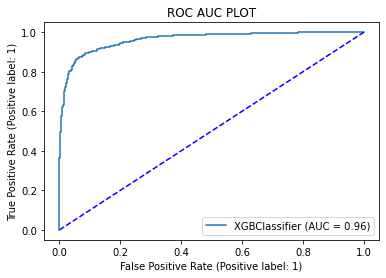

In [79]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(xgc,xc_test,yc_test)
plt.title('ROC AUC PLOT')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.show()

In [80]:
originalcl=np.array(yc_test)
predictedcl=np.array(xgcpred)
df_comcl=pd.DataFrame({'Original':originalcl,'Predicted':predictedcl},index=range(len(originalcl)))
df_comcl

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
2071,1,1
2072,0,0
2073,0,0
2074,1,1


# SAVING BEST MODEL

In [81]:
#for rainfall
import joblib
joblib.dump(knr,'knrfile.obj')

['knrfile.obj']

In [82]:
#for capacity_mw
joblib.dump(xgc,'xgcfile.obj')

['xgcfile.obj']